The goal is to find the characteristics that contribute to the price of an apartment and create an alarm which sends 
an automated email if an apartment comes up with a lower price than it should be.

In [17]:
# Imports collected here
import sys, os
from time import sleep, time
from random import random
from IPython.display import Image, display
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import scrapy
from scrapy import Selector
import numpy as np
import pandas as pd

# Set screenshot path
ROOT_DIR = os.path.dirname(os.path.abspath('JoDa.ipynb'))
path = os.path.join(os.path.sep, ROOT_DIR,'Screenshots'+ os.sep)


In [2]:
# Initialize browser session and settings
WINDOW_SIZE = "1920, 1080"

chromeOptions = webdriver.ChromeOptions()
chromeOptions.add_argument('--headless')
chromeOptions.add_argument('--no-sandbox')
chromeOptions.add_argument('--disable-dev-shm-usage')
chromeOptions.add_argument(f"--window-size={WINDOW_SIZE}")

browser = webdriver.Chrome(options=chromeOptions)

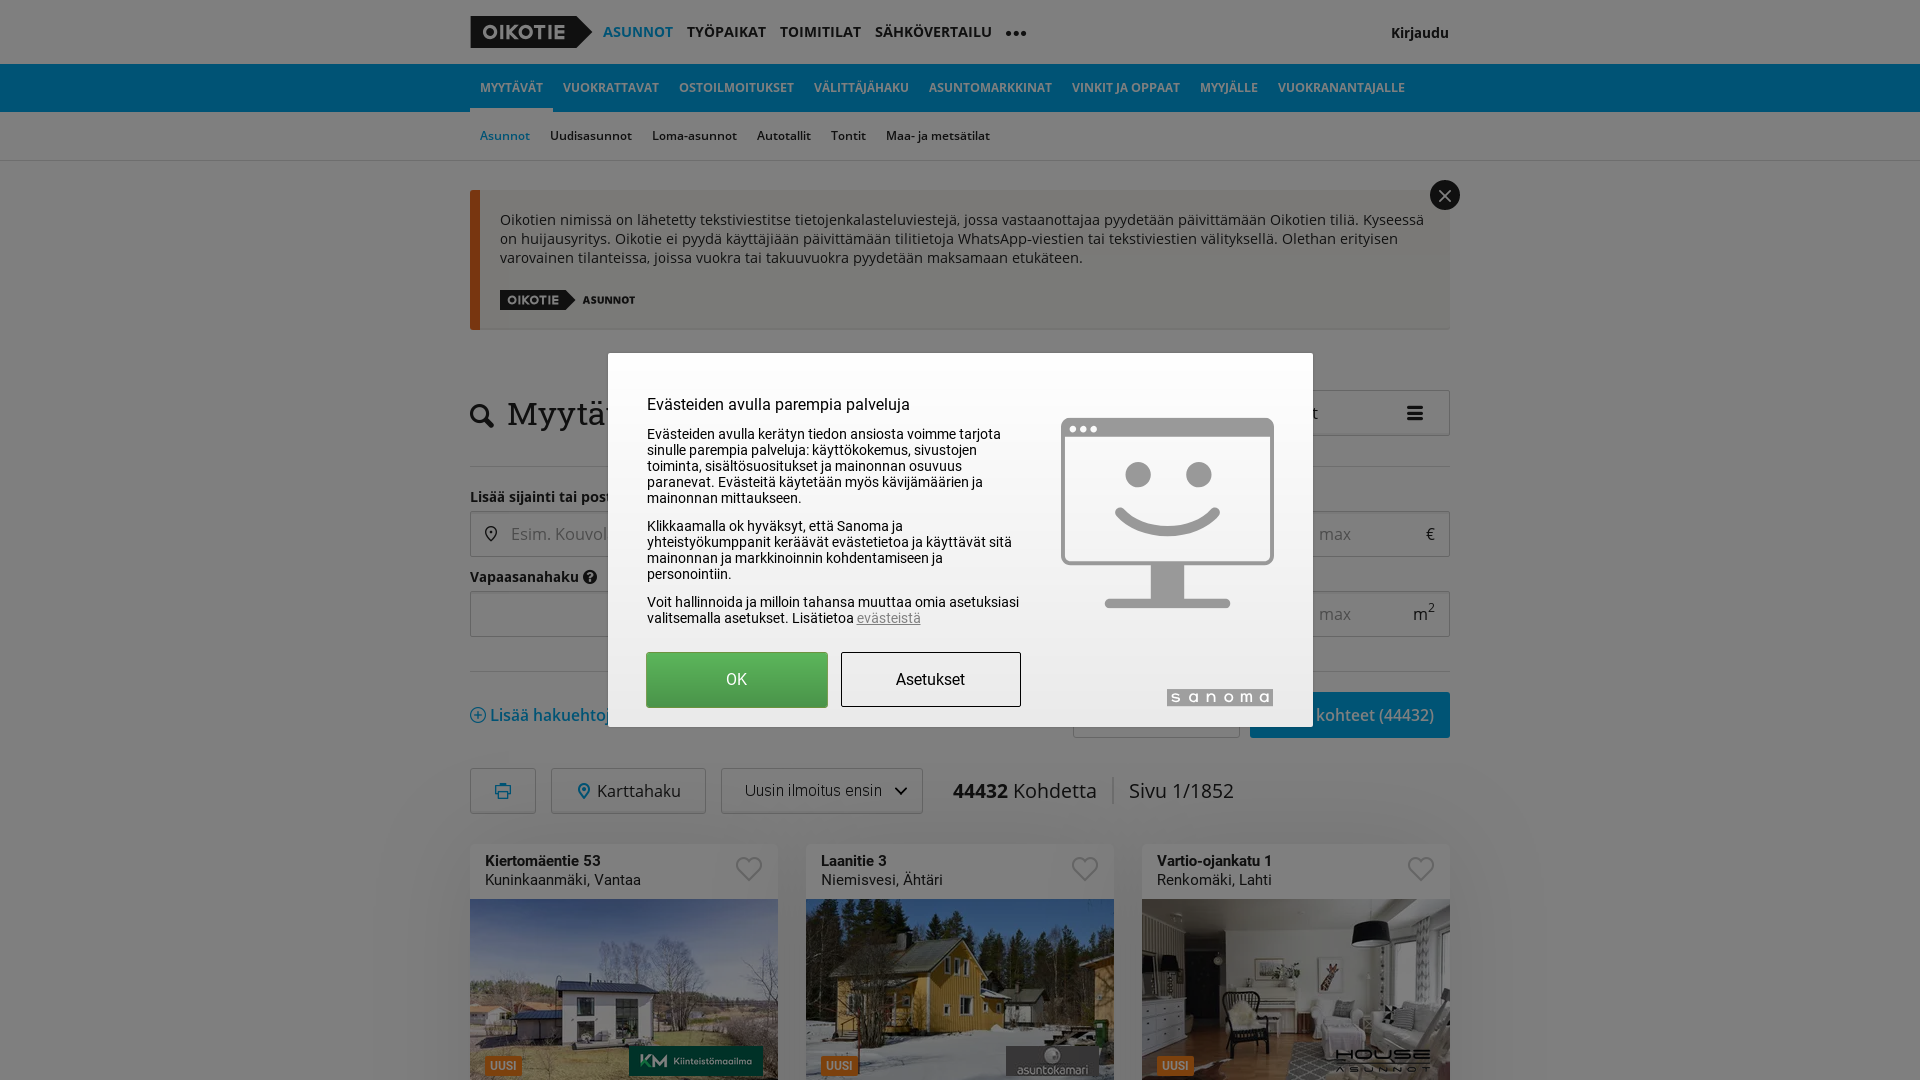

In [3]:
# Go to oikotie.fi
browser.get('https://asunnot.oikotie.fi/myytavat-asunnot')
sleep(2)

browser.save_screenshot(path + 'test1.png')
Image(filename=path + 'test1.png') 

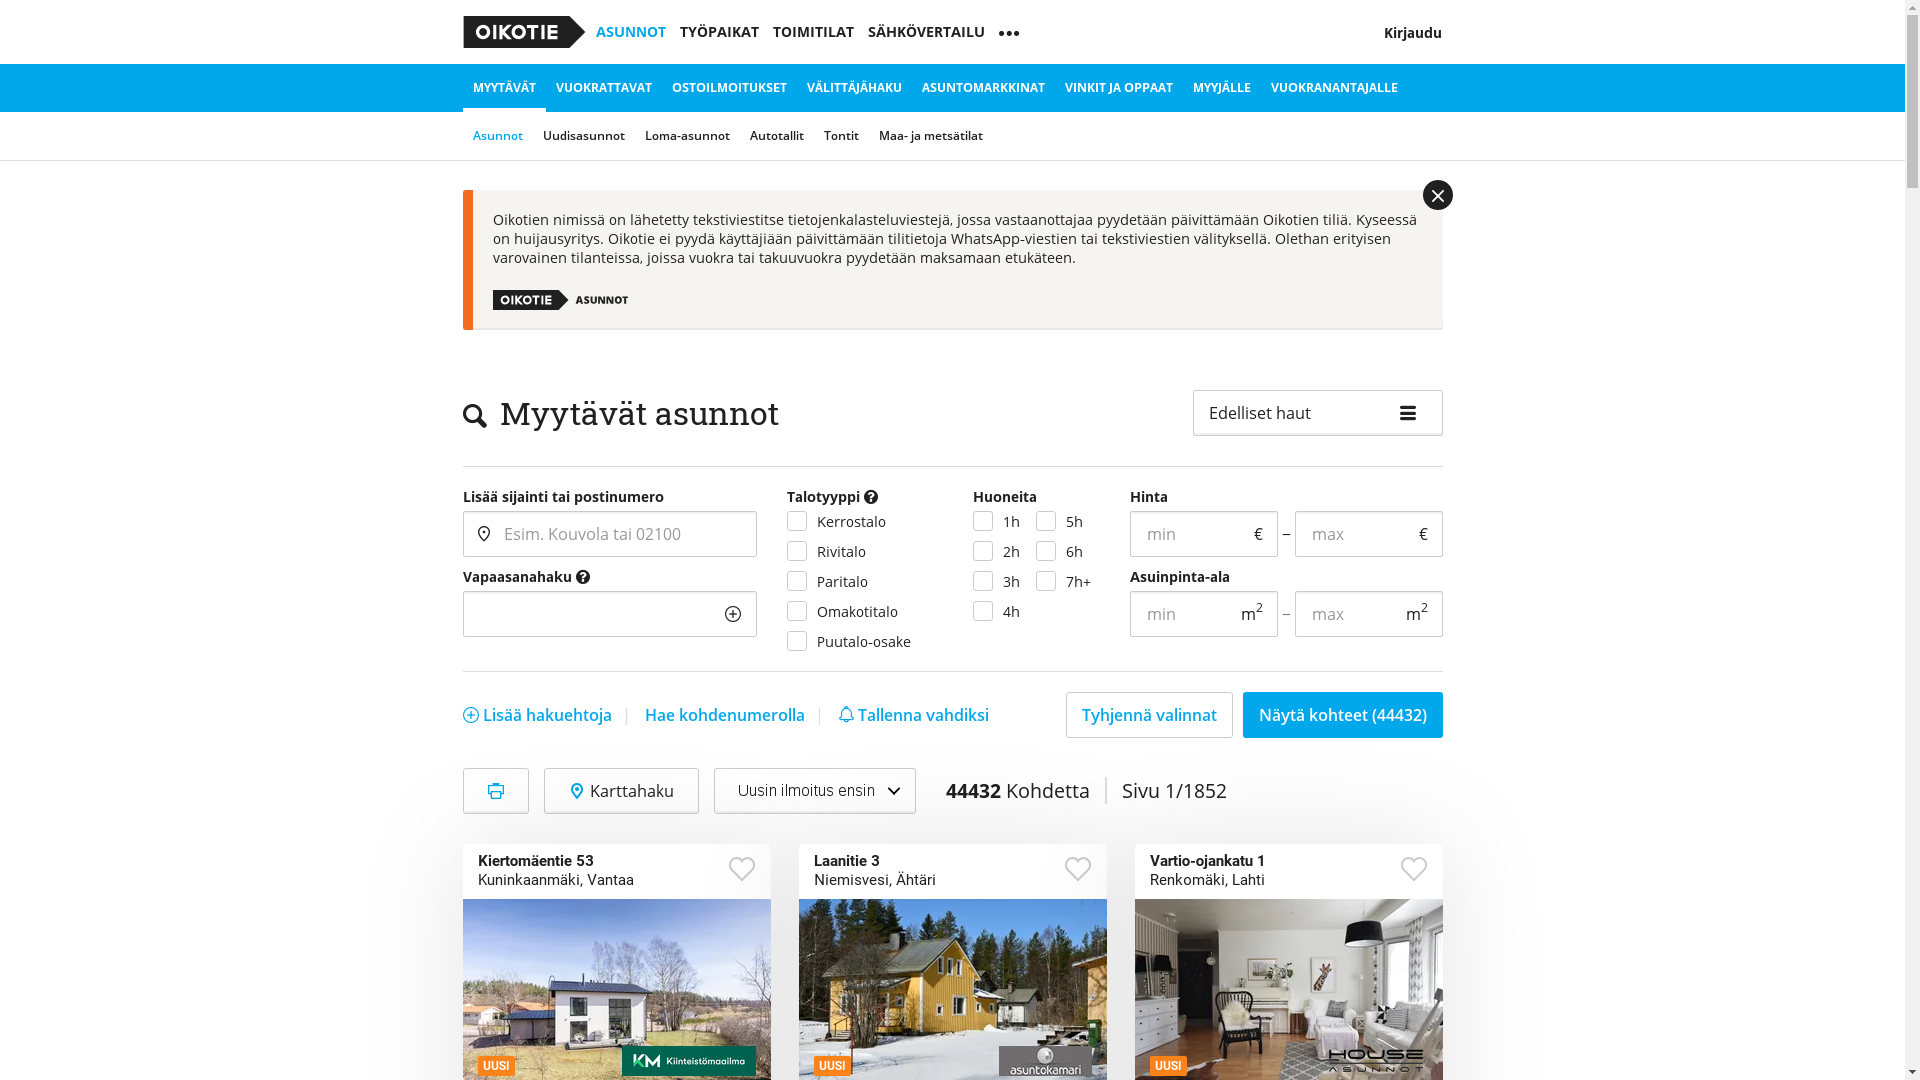

In [4]:
# Click that cookies are OK
cookiesOk = browser.find_element_by_xpath('//*[@id="sccm-opt-out-c1"]')
cookiesOk.click()

sleep(2+random())

browser.save_screenshot(path + 'test2.png')
Image(filename=path + 'test2.png') 

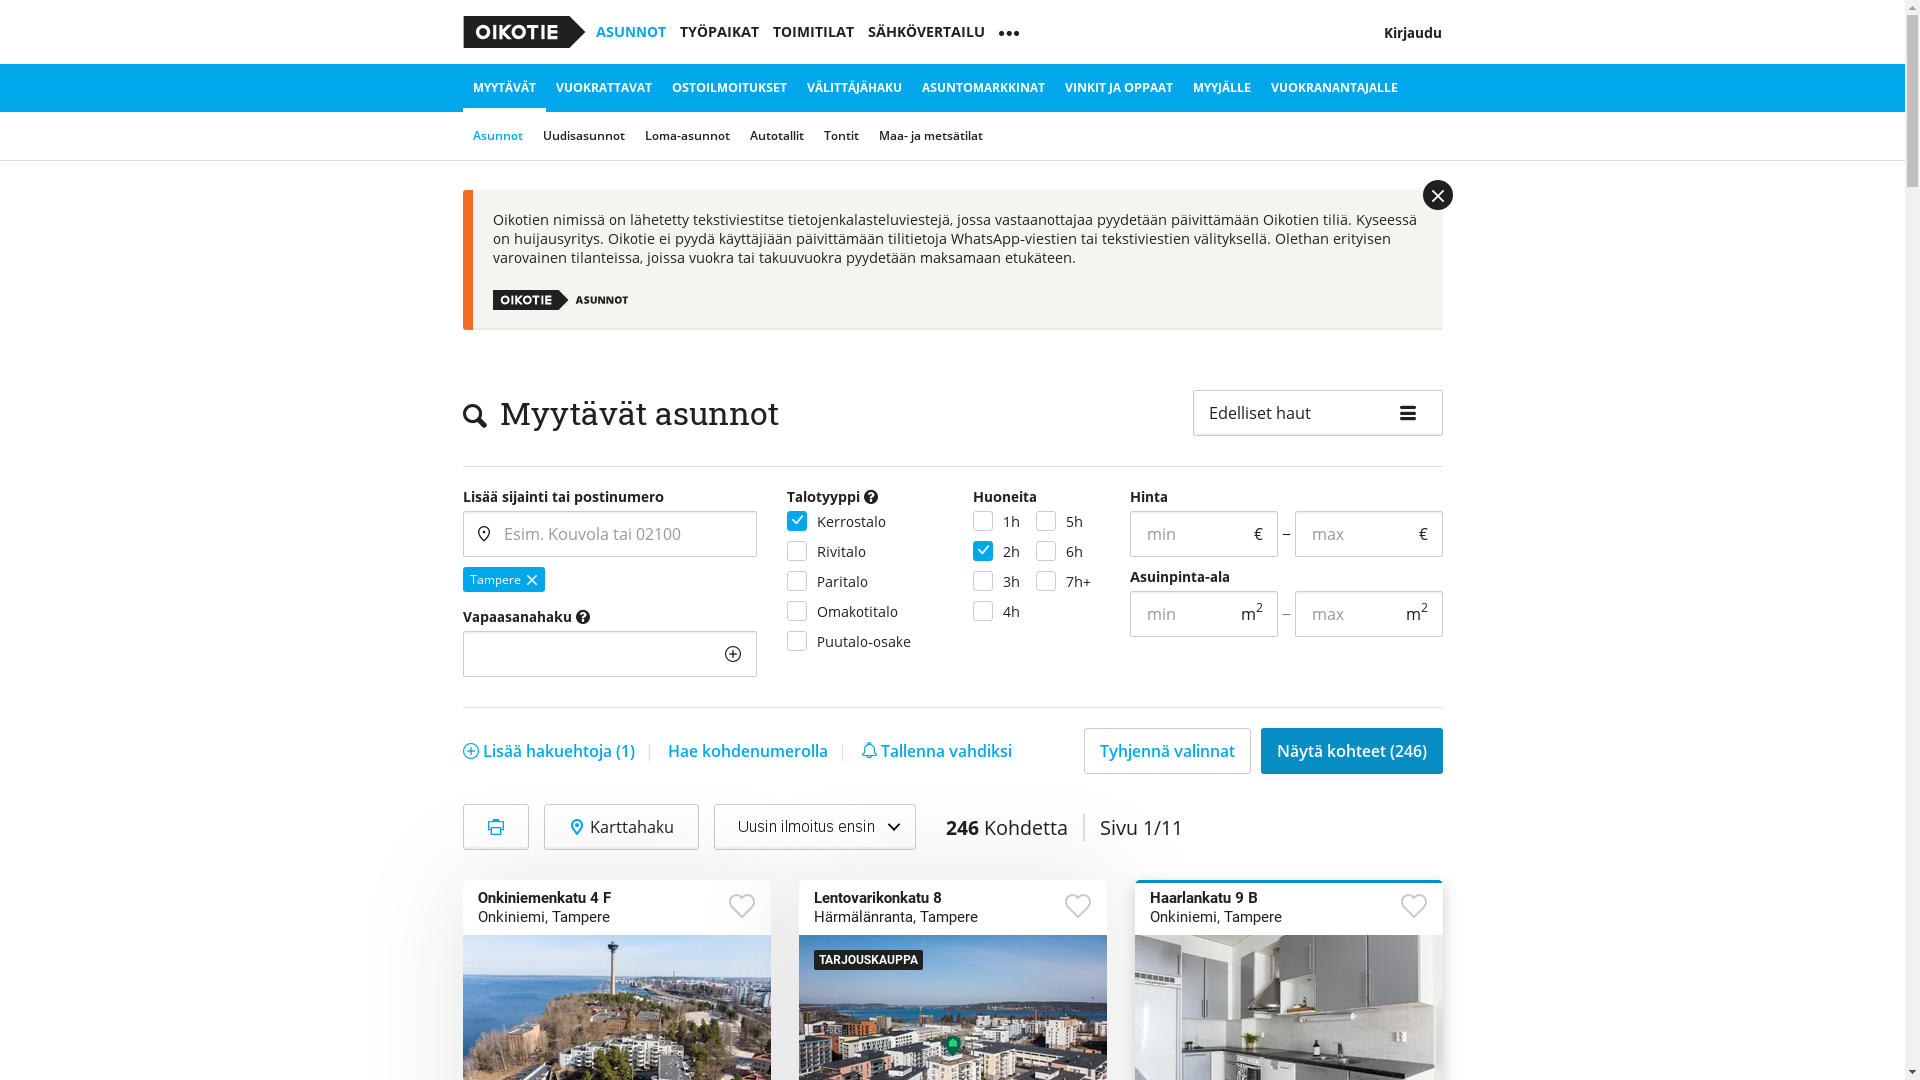

In [5]:
# Assign search parameters
LOCATION = "Tampere"
TWO_ROOMS = True
APARTMENT_BUILDINGS = True
SAUNA = True

# Set location
locationInput = browser.find_element_by_xpath('//*[@id="autocomplete2-input"]')
locationInput.send_keys(LOCATION)
sleep(random())
locationInput.send_keys(Keys.RETURN)
sleep(1+random())

# Set other search parameters
if TWO_ROOMS:
    twoRooms = browser.find_element_by_xpath("//label[text()='2h']")
    twoRooms.click()
    sleep(random())
    
if APARTMENT_BUILDINGS:
    apBuilding = browser.find_element_by_xpath("//label[text()='Kerrostalo']")
    apBuilding.click()
    sleep(random())
    
if SAUNA:                                      
    moreOptions = browser.find_element_by_xpath("//span[text()='Lisää hakuehtoja']")
    moreOptions.click()
    sleep(1+random())

    sauna = browser.find_element_by_xpath("//label[text()='Sauna']")
    sauna.click()
    sleep(random())
    
# Show search results
showResults = browser.find_element_by_xpath("//button[contains(text(), 'Näytä kohteet')]")
showResults.click()

sleep(2+random())

browser.save_screenshot(path + 'test3.png')
Image(filename=path + 'test3.png') 

In [6]:
# Save all links to the search results
all_links = []
i = 0
start = time()
while True:
    scrapy_selector = Selector(text = browser.page_source)
    apartments_selector = scrapy_selector.xpath("//a[contains(@href, 'https://asunnot.oikotie.fi/myytavat-asunnot/tampere/')]")
    all_links += apartments_selector.xpath('@href').getall()
    
    next_button = browser.find_element_by_xpath("//button/span[contains(text(), 'Seuraava')]/..")
    
    try:
        disabled = scrapy_selector.xpath("//button/span[contains(text(), 'Seuraava')]/..").attrib['disabled']
    
    except:
        disabled = False
    
    i += 1
    print("Page " + str(i))
      
    if disabled:
        print("reached end")
        break
    
    if i > 20:
        print("reached end by indexing")
        break
    
    next_button.click()
    sleep(3+random())
    

print('Theres a total of ' + str(len(all_links)) + ' links.')

print("Time elapsed: " + str(time()-start) + " seconds") 

all_links_df = pd.DataFrame(data=all_links)
all_links_df


Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Page 11
reached end
Theres a total of 246 links.
Time elapsed: 38.51574730873108 seconds


,0
0,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
1,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
2,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
3,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
4,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
...,...
241,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
242,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
243,https://asunnot.oikotie.fi/myytavat-asunnot/ta...
244,https://asunnot.oikotie.fi/myytavat-asunnot/ta...


In [9]:
# Go through all the pages and save results to an array

data_array = np.zeros([len(all_links), 19], dtype=object)
i = 0

start = time()

for url in all_links:
    browser.get(url)
    sleep(0.5+random())

    ApSelector = Selector(text = browser.page_source)

    location = ApSelector.xpath("//h1[contains(@class, 'listing-header__headline--secondary')]/span[contains(@class, 'listing-header__text')]/text()").get()
    location_area = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Kaupunginosa')]/following-sibling::dd/a/span/text()").get()
    price_sales = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Myyntihinta')]/following-sibling::dd/text()").get()
    price_no_debt = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Velaton hinta')]/following-sibling::dd/text()").get()
    area = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Asuinpinta-ala')]/following-sibling::dd/text()").get()
    price_per_sq = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Neliöhinta')]/following-sibling::dd/text()").get()
    charge_finance = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Rahoitusvastike')]/following-sibling::dd/text()").get()
    charge_maintenance = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Hoitovastike')]/following-sibling::dd/text()").get()
    charge_total = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Yhtiövastike')]/following-sibling::dd/text()").get()
    floor = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Kerros')]/following-sibling::dd/text()").get()
    rooms = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Huoneiston kokoonpano')]/following-sibling::dd/text()").get()
    rooms_amount = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Huoneita')]/following-sibling::dd/text()").get()
    free_by_date = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Lisätietoa vapautumisesta')]/following-sibling::dd/text()").get()
    balcony = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Parveke')]/following-sibling::dd/text()").get()
    bathroom_equipment = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Kylpyhuoneen varusteet')]/following-sibling::dd/text()").get()
    storage_room = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Säilytystilat')]/following-sibling::dd/text()").get()
    views = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Näkymät')]/following-sibling::dd/text()").get()
    renovations_upcoming = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Tulevat remontit')]/following-sibling::dd/text()").get()
    renovations_done = ApSelector.xpath("//div[contains(@class, 'info-table__row')]/dt[contains(text(), 'Tehdyt remontit')]/following-sibling::dd/text()").get()
    

    data_array[i] = [url, 
                     location, 
                     location_area,
                     price_sales, 
                     price_no_debt,
                     area,
                     price_per_sq,
                     charge_finance,
                     charge_maintenance,
                     charge_total,
                     floor,
                     rooms,
                     rooms_amount,
                     free_by_date,
                     balcony,
                     bathroom_equipment,
                     storage_room,
                     views,
                     renovations_upcoming,
                     renovations_done
                    ]
    
    i += 1

print("Time elapsed: " + str(time()-start) + " seconds") 
    
df = pd.DataFrame(data=data_array)

browser.close()


Time elapsed: 872.344132900238 seconds


In [13]:
# Set up dataframe settings
df.columns = ["URL",
           "Osoite", 
           "Alue", 
           "Myyntihinta", 
           "Velaton hinta", 
           "Pinta-ala", 
           "Neliöhinta", 
           "Rahoitusvastike",
           "Hoitovastike",
           "Yhtiövastike",
           "Kerros",
           "Huonekokoonpano",
           "Vapautuminen",
           "Parveke",
           "Kylpyhuoneen varusteet",
           "Säilytystilat",
           "Näkymät",
           "Tulevat remontit",
           "Tehdyt remontit"
          ]



,URL,Osoite,Alue,Myyntihinta,Velaton hinta,Pinta-ala,Neliöhinta,Rahoitusvastike,Hoitovastike,Yhtiövastike,Kerros,Huonekokoonpano,Vapautuminen,Parveke,Kylpyhuoneen varusteet,Säilytystilat,Näkymät,Tulevat remontit,Tehdyt remontit
0,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Onkiniemenkatu 4 F, Onkiniemi, Tampere",Onkiniemi,192 000 €,192 000 €,65 m²,"2 953,85 € / m",0 € / kk,"292,50 € / kk","292,50 € / kk",1 / 3,"2h, k, kph/s, eril. wc, vh, lasitettu parveke",Heti,Kyllä,"Sauna, sähkökiuas Helo, kylpyhuone, erillinen ...","Vaatehuone, kellari, jäähdytetty kellari",Läpitalon asunto. Parveke etelän suuntaan.Ikku...,Suunnitellut: Kunnosapitotarveselvituksen muka...,1998 Parvekelaattojen kallistukset korjattu\n2...
1,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Lentovarikonkatu 8, Härmälänranta, Tampere",Härmälänranta,154 000 €,154 000 €,"47,5 m²","3 242,11 € / m",None,"137,75 € / kk","137,75 € / kk",1 / 5,"2h, kt, kph, s, lasit.p","Sopimuksen mukaan, esim. 2kk kaupanteosta",Kyllä,"Kylpyhuone: Suihku, suihkuseinä, seinä-wc, bid...","Kaapistot, kellarikomero, ulkoiluvälinevarasto","puistomaiset, pihalle","Kiinteistön kuntoarvio, väestönsuojan määräaik...","Vuositakuukorjauksia 2014, B- talon päädyn ja ..."
2,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Haarlankatu 9 B, Onkiniemi, Tampere",Onkiniemi,"221 129,47 €",224 000 €,"62,5 m²",3 584 € / m,"27,26 € / kk","245,63 € / kk","272,89 € / kk",2 / 4,2h+k+s+lasitettu parveke,Heti,Kyllä,Huoneiston kosteat tilat ovat käytännölliset. ...,Kellarikomero,Huoneiston ikkunoiden ilmansuuntana on pohjoinen.,Suunnitellut: Kunnossapitotarveselvityksen muk...,2017 ilmastointijärjestelmän puhdistus ja säät...
3,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Kansikatu 8 B 216, Keskusta, Tampere",Keskusta,165 608 €,349 780 €,"53,5 m²","6 537,94 € / m","326,79 € / kk","203,30 € / kk","530,09 € / kk",17 / 17,"2h, kt, s, kph, lasitettu parveke",Arvioitu valmistuminen joulukuussa 2020.,Kyllä,"SAUNA: tervaleppä-panelointi, lasiovi. KPH: su...","Kaapistot, lämmin irtaimistovarasto. Yhteiskäy...",Avarat näkymät yli kaupungin Pyhäjärvelle..,None,None
4,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Pöllikuja 1 As, Pispala, Tampere",Pispala,149 000 €,149 000 €,"44,5 m²","3 348,31 € / m",None,None,"111,25 € / kk",1 / 2,"2h, kk, kph, s, vh, lasit. parveke",sopimuksen mukaan,Kyllä,"Varustus: suihkuseinä, pesukoneliitäntä, wc-is...","Kuvaus: Kaapistot, vaatehuone ja häkkivarasto",Rauhalliset näkymät taloyhtiön pihamaalle. Par...,kts. kunnossapitosuunnitelma,Lumiesteiden kunnostus 2011. Teräsosien maalaa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",Ranta-Tampella,71 060 €,238 150 €,"35,5 m²","6 708,45 € / m","752,99 € / kk","152,65 € / kk","905,64 € / kk",4 / 8,2h+kt+s+p,None,Kyllä,None,None,None,None,None
242,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",Ranta-Tampella,71 980 €,242 150 €,"35,5 m²","6 821,13 € / m","766,87 € / kk","152,65 € / kk","919,52 € / kk",5 / 8,2h+kt+s+p,None,Kyllä,None,None,None,None,None
243,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",Ranta-Tampella,76 790 €,256 200 €,"49,5 m²","5 175,76 € / m","808,51 € / kk","212,85 € / kk","1 021,36 € / kk",6 / 8,2h+kt+s+p,None,Kyllä,None,None,None,None,None
244,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Messukylänkatu 30, Messukylä, Tampere",Messukylä,103 994 €,344 000 €,"69,5 m²","4 949,64 € / m","1 080,69 € / kk","205,03 € / kk","1 285,72 € / kk",5 / 5,2h+kt+s+p,None,Kyllä,None,None,None,None,None


In [25]:
# Show dataframe and save it to .csv and .xls
display(df)

csv_path = os.path.join(os.path.sep, ROOT_DIR,'resultfiles'+ os.sep +"apartments.csv")
xls_path = os.path.join(os.path.sep, ROOT_DIR,'resultfiles'+ os.sep +"apartments.xlsx")

print(csv_path)

df.to_csv(csv_path, sep=";", encoding='utf-8')
df.to_excel(xls_path, encoding='utf-8')

,URL,Osoite,Alue,Myyntihinta,Velaton hinta,Pinta-ala,Neliöhinta,Rahoitusvastike,Hoitovastike,Yhtiövastike,Kerros,Huonekokoonpano,Vapautuminen,Parveke,Kylpyhuoneen varusteet,Säilytystilat,Näkymät,Tulevat remontit,Tehdyt remontit
0,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Onkiniemenkatu 4 F, Onkiniemi, Tampere",Onkiniemi,192 000 €,192 000 €,65 m²,"2 953,85 € / m",0 € / kk,"292,50 € / kk","292,50 € / kk",1 / 3,"2h, k, kph/s, eril. wc, vh, lasitettu parveke",Heti,Kyllä,"Sauna, sähkökiuas Helo, kylpyhuone, erillinen ...","Vaatehuone, kellari, jäähdytetty kellari",Läpitalon asunto. Parveke etelän suuntaan.Ikku...,Suunnitellut: Kunnosapitotarveselvituksen muka...,1998 Parvekelaattojen kallistukset korjattu\n2...
1,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Lentovarikonkatu 8, Härmälänranta, Tampere",Härmälänranta,154 000 €,154 000 €,"47,5 m²","3 242,11 € / m",None,"137,75 € / kk","137,75 € / kk",1 / 5,"2h, kt, kph, s, lasit.p","Sopimuksen mukaan, esim. 2kk kaupanteosta",Kyllä,"Kylpyhuone: Suihku, suihkuseinä, seinä-wc, bid...","Kaapistot, kellarikomero, ulkoiluvälinevarasto","puistomaiset, pihalle","Kiinteistön kuntoarvio, väestönsuojan määräaik...","Vuositakuukorjauksia 2014, B- talon päädyn ja ..."
2,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Haarlankatu 9 B, Onkiniemi, Tampere",Onkiniemi,"221 129,47 €",224 000 €,"62,5 m²",3 584 € / m,"27,26 € / kk","245,63 € / kk","272,89 € / kk",2 / 4,2h+k+s+lasitettu parveke,Heti,Kyllä,Huoneiston kosteat tilat ovat käytännölliset. ...,Kellarikomero,Huoneiston ikkunoiden ilmansuuntana on pohjoinen.,Suunnitellut: Kunnossapitotarveselvityksen muk...,2017 ilmastointijärjestelmän puhdistus ja säät...
3,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Kansikatu 8 B 216, Keskusta, Tampere",Keskusta,165 608 €,349 780 €,"53,5 m²","6 537,94 € / m","326,79 € / kk","203,30 € / kk","530,09 € / kk",17 / 17,"2h, kt, s, kph, lasitettu parveke",Arvioitu valmistuminen joulukuussa 2020.,Kyllä,"SAUNA: tervaleppä-panelointi, lasiovi. KPH: su...","Kaapistot, lämmin irtaimistovarasto. Yhteiskäy...",Avarat näkymät yli kaupungin Pyhäjärvelle..,None,None
4,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Pöllikuja 1 As, Pispala, Tampere",Pispala,149 000 €,149 000 €,"44,5 m²","3 348,31 € / m",None,None,"111,25 € / kk",1 / 2,"2h, kk, kph, s, vh, lasit. parveke",sopimuksen mukaan,Kyllä,"Varustus: suihkuseinä, pesukoneliitäntä, wc-is...","Kuvaus: Kaapistot, vaatehuone ja häkkivarasto",Rauhalliset näkymät taloyhtiön pihamaalle. Par...,kts. kunnossapitosuunnitelma,Lumiesteiden kunnostus 2011. Teräsosien maalaa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",Ranta-Tampella,71 060 €,238 150 €,"35,5 m²","6 708,45 € / m","752,99 € / kk","152,65 € / kk","905,64 € / kk",4 / 8,2h+kt+s+p,None,Kyllä,None,None,None,None,None
242,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",Ranta-Tampella,71 980 €,242 150 €,"35,5 m²","6 821,13 € / m","766,87 € / kk","152,65 € / kk","919,52 € / kk",5 / 8,2h+kt+s+p,None,Kyllä,None,None,None,None,None
243,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Ranta-Tampellan katu 15, Ranta-Tampella, Tampere",Ranta-Tampella,76 790 €,256 200 €,"49,5 m²","5 175,76 € / m","808,51 € / kk","212,85 € / kk","1 021,36 € / kk",6 / 8,2h+kt+s+p,None,Kyllä,None,None,None,None,None
244,https://asunnot.oikotie.fi/myytavat-asunnot/ta...,"Messukylänkatu 30, Messukylä, Tampere",Messukylä,103 994 €,344 000 €,"69,5 m²","4 949,64 € / m","1 080,69 € / kk","205,03 € / kk","1 285,72 € / kk",5 / 5,2h+kt+s+p,None,Kyllä,None,None,None,None,None


/home/jupyter/resultfiles/apartments.csv
